In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [2]:
data_year_all = pd.read_csv("D:/Data-Analysis/Stock Market/TCS_YEAR_ALL.csv")
data_year_all

,Year,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,DematFlagExist
0,2004,1076.00,1338.00,958.55,1335.50,47397004,1162694,51266914295,12109331,25.55,379.45,259.50,NaN
1,2005,1349.80,1750.85,1091.00,1702.45,63160750,1422277,84809899203,20531913,32.51,659.85,352.65,NaN
2,2006,1707.00,2099.00,900.00,1218.60,57116956,1640999,79851718555,29973413,52.48,1199.00,-488.40,NaN
3,2007,1250.00,1399.00,935.00,1083.35,79522052,1747807,92570784422,50158624,63.08,464.00,-166.65,NaN
4,2008,1065.10,1078.00,418.00,478.10,75871717,2106962,56944484110,28717825,37.85,660.00,-587.00,NaN
5,2009,485.00,805.00,355.25,749.75,108462189,2084765,60476861965,39724991,36.63,449.75,264.75,NaN
6,2010,750.70,1179.00,692.00,1165.05,62694021,1396016,53121079184,26982541,43.04,487.00,414.35,NaN
7,2011,1165.00,1247.00,902.90,1161.25,50122536,1903284,55627676107,16354716,32.63,344.10,-3.75,NaN
8,2012,1155.15,1438.00,1046.55,1258.55,35695684,1362552,43607787115,14942552,41.86,391.45,103.40,NaN
9,2013,1268.00,2258.05,1255.00,2170.95,31269625,1672640,52925555188,12284320,39.29,1003.05,902.95,NaN


In [20]:
#train_year = np.array(data_year_all['Year'][:-3])
train_data = np.array(data_year_all['Spread High-Low'][:-3])
test_data = np.array(data_year_all['Spread High-Low'][-3:])
test_year = np.array(data_year_all['Year'][-3:])

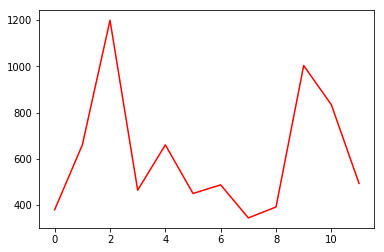

In [21]:
plt.plot( train_data, "-r")

In [27]:
def classify(mn, trainee):
    if trainee>mn:
        return True
    else:
        return False

mean_train_val = np.mean(train_data)
print(mean_train_val)
log_train_data = np.array(list(map(lambda x: classify(x,mean_train_val), train_data)))

613.7083333333334


In [23]:
logistic = linear_model.LogisticRegression()
logistic.fit(train_data.reshape(-1, 1), log_train_data.reshape(-1, 1))

C:\Users\Anirban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
log_coef = logistic.coef_
log_incpt = logistic.intercept_

print(log_coef, log_incpt, sep="\n")

[[-0.00248697]]
[1.37048424]


[[2.2165826 ]
 [2.19411994]
 [2.36292353]]


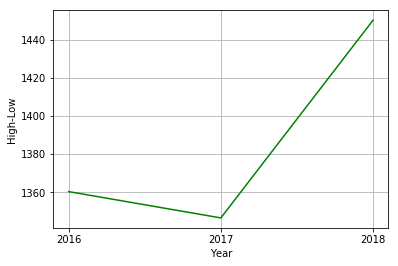

In [67]:
def sigmoid(x):
    return 1 / (1 + math.exp(x))

test_h_l = np.array(list(map(lambda x: sigmoid(log_coef*x)+log_incpt, test_data)))
print(test_h_l)

plt.grid()
plt.ylabel('High-Low')
plt.xlabel('Year')

plt.xticks([2016, 2017, 2018])
plt.plot(test_year, mean_train_val*test_h_l, "-g")
#plt.plot(test_year, test_data, "-b")

In [69]:
#print(logistic.score(train_data.reshape(-1,1), log_train_data))

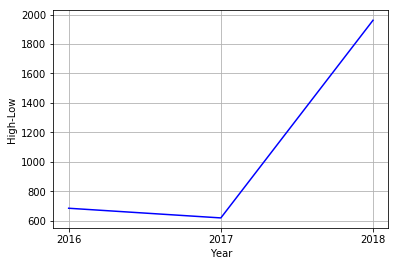

In [71]:
plt.grid()
plt.ylabel('High-Low')
plt.xlabel('Year')

plt.xticks([2016, 2017, 2018])
plt.plot(test_year, test_data, "-b")